
# Assignment 3

**Submission deadline: last lab session before or on Wednesday, 8.11.17**

**Points: 12 + 4 bonus points**


## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook.

For programming exerciese add your solutions to the notebook. For math exercies please provide us with answers on paper or type them in the notebook (it supports Latex-like equations).

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1: Gradient Descent [2p + 2b]

The Gradient Descent (GD) algorithm finds the minimum of a given
function by taking small steps along the function's gradient. In
pseudocode:

>$\Theta \leftarrow \Theta_0$

>**while** stop condition not met **do**

>$~~~~$$\Theta \leftarrow \Theta - \alpha \nabla_\Theta f(\Theta)$

>**end while**

where $f$ is the function to minimize, $\nabla_\Theta f(\Theta)$
denotes $f$'s gradient at $\Theta$ and $\alpha$ is the step size,
taking typically values from $10^{-4},\ldots,10^{-1}$.


1. **[1p]** Implement the GD algorithm as a function:

  \begin{equation}
      \Theta_{opt} = \text{GD}(f, \Theta_0, \alpha, \rho),
  \end{equation}

  where $f$ is a function returning the cost and the gradient of the
  cost with respect to parameter vector
  $\Theta$, $\Theta_0$ is the initial value, and $\alpha$
  is the step size (a.k.a. the learning rate).
  You can assume that $\alpha$
  remains constant throughout the optimization.
  Terminate when the function values will differ by less than $\rho$
  between subsequent iterations, eg. by $10^{-10}$.

2. **[1p]** Use the GD algorithm to find the optimum of the
  Rosenbrock (https://en.wikipedia.org/wiki/Rosenbrock_function) function.
  Set $(0,2)$ as the initial point. Try to set an appropriate learning rate
  $\alpha$.

  Plot the values found by GD at subsequent iterations. Set log scale for
  the Y axis.

  Plot function contours and values of $\Theta$ at subsequent
  iterations.
  
  **Note**: You can debug your implementation by using the
  gradient checking routines.
  
  Numerical optimization is of great importance,
  and many algorithms beside GD exists. Get familiar with the L-BFGS
  algorithm
  (for Python: `scipy.optimize.fmin_l_bfgs_b`). Use the
  L-BFGS algorithm to find the optimum of the Rosenbrock function
  and plot the contours and $\Theta$'s in subsequent iterations.

  How many iterations do BGD and L-BFGS need to find a point, for
  which the Rosenbrock function value is lower than $10^{-10}$?
  
3. **[2p bonus]** Implement Newton's method (https://en.wikipedia.org/wiki/Newton's_method_in_optimization) and compare it with the previous methods. You will also need to implement a line search alogithm, e.g. (https://en.wikipedia.org/wiki/Backtracking_line_search) and make sure that the Newton's direction is indeed one along which the function is minimized (the Newton method is only guaranteed to work on convex functions, and behaves badly near critical points of non-convex functions).

In [47]:
#
# Implement the Rosenbrock function
#

from common.gradients import check_gradient

def rosenbrock_v(x):
    """Returns the value of Rosenbrock's function at x"""
    a=1
    b=100
    return (a-x[0])**2 + b*(x[1]-x[0]**2)**2  

def rosenbrock(x):
    """Returns the value of rosenbrock's function and its gradient at x
    """
    val = rosenbrock_v(x)
    dVdX0 = 2*(200*x[0]**3-200*x[0]*x[1]+x[0]-1)
    dVdX1 = 200*(x[1]-x[0]**2)
    dVdX= np.array([dVdX0, dVdX1])
    return [val, dVdX]

#
# Feel free to add your own test points.
#
for test_point in [[0., 0.5],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(rosenbrock, np.array(test_point), prec=1e-5)

In [39]:
#
# Fill in the details of the gradient descent
#

def GD(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    """Runs gradient descent algorithm on f.
    
    The baisic iteration is:
    val, dVdTheta <- f(Theta)
    Theta <- -alpha * dVdTheta
    
    Args:
        f: function that when evalueted on a Theta of same dtype and shape as Theta0
            returns a tuple (value, dVdTheta) with dValuedTheta of the same shape
            as Theta
        Theta0: starting point
        alpha: step length
        stop_tolerance: stop iterations when improvement is below this threhsold
        max_steps: maximum number of steps
        
    Returns:
        tuple:
        - ThetaOpt
        - history: list of length num_steps containing tuples (Theta, (val, dValdTheta))
    
    """
    history = []
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step < max_steps:
        previous_value = value
        value, gradient = f(Theta)
        history.append([Theta, (value, gradient)])
        
        if abs(value - previous_value) < stop_tolerance:
            break
        
        Theta = Theta - alpha*gradient
        
        history.append([Theta, f(Theta)])
        step += 1
    
    history.append([Theta, f(Theta)])
    return Theta, history

Found optimum at [ 0.99964674  0.99929219] in 33708 steps (true minimum is at [1,1])


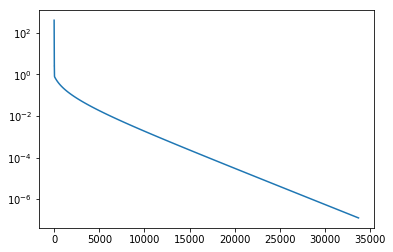

In [40]:
#
# Find the optimum
#

X0 = [0.,2.]
Xopt, Xhist = GD(rosenbrock, X0, alpha=1e-3, stop_tolerance=1e-10, max_steps=1e6)

print "Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist))

plt.semilogy(list(map(lambda x : x[1][0], Xhist)))



[[0.0, 2.0], (401.0, array([  -2.,  400.]))]


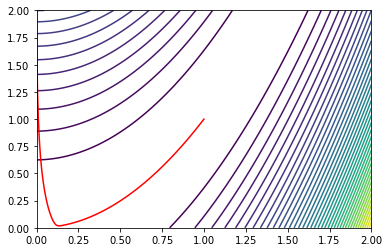

In [41]:
X,Y = meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))
Z = np.array([rosenbrock_v(x) for x in zip(X, Y)]) #exp interv
contour(X, Y, Z, 50)
xaxis = np.array([x[0][0] for x in Xhist])
yaxis = np.array([x[0][1] for x in Xhist])
plot(xaxis, yaxis, color='red')
print(Xhist[0])

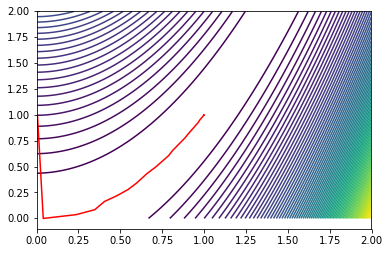

In [121]:
#
# Use scipy.optimize.fmin_l_bfgs_b
# Again plot the path on the coutnour plot
#
# Hint: to save the points you can use the callback argument!
#

import scipy.optimize as sopt
lbfsg_hist = []
def save_hist(x):
    lbfsg_hist.append(np.array(x))

x_start = [0.,2.]
lbfsgb_ret = sopt.fmin_l_bfgs_b(rosenbrock, x_start, callback=save_hist)

x = np.arange(0, 2, 0.002)
y = np.arange(0, 2, 0.002)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_v((X,Y))
contour(X, Y, Z, 100)

xaxis = np.array([x[0] for x in lbfsg_hist])
yaxis = np.array([x[1] for x in lbfsg_hist])
plot(xaxis, yaxis, color='red')

In [107]:
# Newtod-Raphson Method

def rosenbrock_hessian(x):
    dVdX0 = 2*(200*x[0]**3-200*x[0]*x[1]+x[0]-1)
    dVdX1 = 200*(x[1]-x[0]**2)
    dVdX= np.array([dVdX0, dVdX1])
    val = rosenbrock(x)[0]
    H = np.array([1200*x[0]**2 - 400*x[1] + 2, -400*x[0], -400*x[0], 200]).reshape((2,2))
    return [val, np.array((dVdX0, dVdX1)), H]


def Newton(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    
    # TODO:
    #  - implement the newton method and a simple line search
    #  - make sure your function is resilient at critical points (such as seddle points)
    #  - if the Newton direction is not minimizing the function, use the gradient for a few steps
    #  - try to beat L-BFGS on the bmber of function evaluations needed!
    steps = 0
    value = np.inf
    previous_value = -np.inf
    history = []
    Theta = Theta0
    C = 0.5
    T = 0.5
    
    while(steps<max_steps and abs(value-previous_value)>stop_tolerance):
        previous_value = value
        value, gradient = f(Theta)
        history.append([Theta, (value, gradient)])
        P = -np.dot(np.linalg.inv(rosenbrock_hessian(Theta)[2]), rosenbrock(Theta)[1])
        M = np.dot(np.reshape(P, (1,-1)), rosenbrock(Theta)[1])
        s=0
        while(s<10 and f(Theta+alpha*P)[0] > f(Theta)[0]+alpha*C*M):
            alpha = alpha*T
            s = s+1
        
        Theta = Theta + alpha*P
        steps = steps+1
        
    return Theta, history

Found optimum at [-0.13302823  0.05945071] in 3870 steps (true minimum is at [1,1])


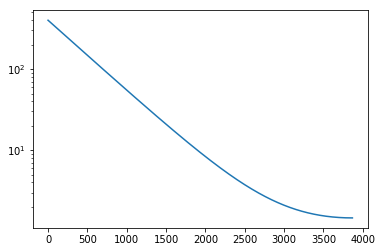

In [108]:
X0 = [0,2]
Xopt, Xhist = Newton(rosenbrock, X0, alpha=1e-3, stop_tolerance=1e-10, max_steps=1e6)

print "Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist))

plt.semilogy(list(map(lambda x : x[1][0], Xhist)))


# Problem 2: Logistic Regression [1p]

Linear regression is suitable for problems, where
the forecasted values are real numbers. We use logistic regression,
when we want to label the data with $0$ and $1$.

Let $x\in \mathbb{R}^n$ be a vector of $n$ real numbers, and
$y\in \{0,1\}$ the given class label. Similarly to what was shown
during the lecture, we add an additional element $x_0=1$
to vector $x$, to account for the bias term (and simplify the equations).

Similarly to linear regression, vector
$\Theta\in \mathbb{R}^{n+1}$ parametrizes the model
($n$ coefficients describes the data, the remaining one is the intercept).
In logistic regression, we model conditional probability that
sample $x$ belongs to class $1$ as:

\begin{equation}
p(\text{class}=1|x, \Theta)=h_\Theta(x) = \sigma\left(\sum_{j=0}^n \Theta_j x_j\right) 
= \sigma\left(\Theta^T x \right),
\end{equation}

where $\sigma(a) = \frac{1}{1+\exp(-a)}$ is being called the logistic sigmoid
(a function, which plot is s-curved).

An unknown sample $x$ is being labeled $1$ if
$h_\Theta(x)\geq 0.5$, or equivalently, $\Theta^T x \geq 0$.

Classification mismatch between the forecasted values and
the data is being measured most of the time with cross-entropy:

\begin{equation}
    J(\Theta) = - \sum_{i=1}^m y^{(i)} \log \left(h_\Theta (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_\Theta (x^{(i)})\right),
\end{equation}

assuming $0\log(0)=0$.

Use logistic regression to distinguish
  _Versicolor_ and _Virginica_ irises. Use only the
  `petal length` and `petal width` features. Use either
  Gradient Descent, or L-BFGS to solve for the optimal $\Theta$.
  Prepare the scatterplot of the data and plot the class separation
  boundary found by logistic regression.

In [114]:
from sklearn import datasets
iris = datasets.load_iris()
print 'Features: ', iris.feature_names
print 'Targets: ', iris.target_names
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


Text(0,0.5,u'petal_width')

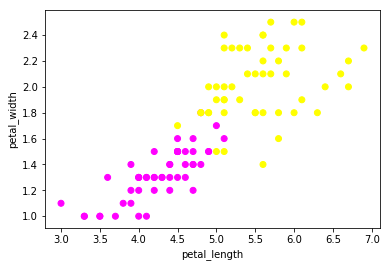

In [115]:
#Extract the petal_length and petal_width of versicolors and virginicas

IrisX = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[:, iris.target!=0]

# Set versicolor=0 and virginica=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

(2.7951433691756273, 7.104856630824373)

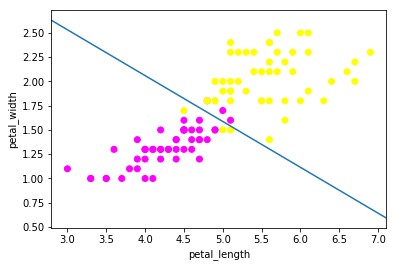

In [120]:
class LogisticRegressionCost(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    #note: this creates a Pyton callable - i.e. an abject that can be called as a function
    def __call__(self, Theta):
        X = self.X
        Y = self.Y
        
        #reshape Theta
        ThetaR = Theta.reshape(X.shape[0],1)
        S = 1/(1 + numpy.exp(-np.dot(ThetaR.T, X)))
        nll = -np.sum(np.multiply(Y, np.log(S)) + np.multiply((1-Y), np.log(1-S)))  
        
        grad = np.dot(S-Y, X.T)
        
        #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
        return nll, grad.reshape(Theta.shape)

iris_log_reg = LogisticRegressionCost(IrisX, IrisY)

for test_point in [[0., 0.],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(rosenbrock, np.array(test_point), prec=1e-5)


Theta0 = np.zeros((3))
check_gradient(iris_log_reg, Theta0)

#
# Call a solver
#

ThetaOpt = GD(iris_log_reg, Theta0, alpha=1e-4)[0]

#
# Now plot the found separation line 
# 

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')
pl_min, pl_max = xlim()
pl = linspace(pl_min, pl_max, 1000)
plot(pl, -(ThetaOpt[0]+ThetaOpt[1]*pl)/ThetaOpt[2])
xlim(pl_min, pl_max)

# Problem 3: Backpropagation through a *tanh* Neuron [2p]


In the following assignments let:
 * $X \in \mathbb{R}^{k\times N}$ be the data matrix containing $N$
  samples each described with $k$ features. The $i$-th sample $x^{(i)} \in
  \mathbb{R}^{(k\times 1)}$ is the $i$-th column of $X$.
 * $Y \in \mathbb{R}^{1\times N}$ be the row-vector of targets,
  with $y^{(i)}$ being the target for the $i$-th sample.
 * $\Theta\in\mathbb{R}^{k\times 1}$ be the vector of parameters.


  We want to use a single neuron with the $\tanh(x) = \frac{e^x -
    e^{-x}}{e^x + e^{-x}}$ activation function.
  First find the derivative $\frac{\partial \tanh(x)}{\partial
    x}$ and express it as a function of $\tanh(x)$.
  Forward computations performed by the neuron are:
  
  \begin{align*}
    A &= \Theta^T X \\
    \hat{Y} &= \tanh(A) \text{ applied elementwise} \\
    E &= Y - \hat{Y} \\
    J &= E \cdot E^T
  \end{align*}

___


**[2p]**  Find and express using matrix notation the following gradients. You
  can refer to values and gradients computed earlier in the expressions for the
  following ones -- just as you would when implementing a computer
  program. Use $\odot$ for the elementwise multiplication of matrices.

  \begin{align*}
    \frac{\partial J}{\partial E } &= 2*E \\
    \frac{\partial J}{\partial \hat{Y}} &= -2*E \\
    \frac{\partial J}{\partial A} &= 2*E\odot(\hat{Y}^2-1) \\
    \frac{\partial J}{\partial \Theta} &= 2*X^T* E\odot(\hat{Y}^2-1)  \\
  \end{align*}
  
  **Note:** each gradient above should be implementable as a
  compact expression in Python+NumPy.

  **Hint:** write down the shapes of all values that you
  compute. Work out the expressions for a single element of the
  gradient, then see how they can be expressed using the matrix
  notation.

# Problem 7 [1p]

Answer the following:
  
   * Are neural networks parametric (https://en.wikipedia.org/wiki/Parametric_model) or non-parametric (https://en.wikipedia.org/wiki/Non-parametric_model) models? Why is it so?
   
   * What will happen if for each layer (hidden and output) all weights
    will be initialized to the same values before the training?
    
   * How will the value of SoftMax function change,
  if we will add the same constant term to each element of $a$?
  Often, before computing SoftMax, the largest value can be subtracted
  to mitigate large exponents and associated numerical errors.
  Is it a good practice?

   * Are two-class SoftMax regression and logistic regression equivalent (can you build a logistic regression model from a given softmax one and vice versa)?

**Answers:**
* Neural networks are parametric because they have a defined structure and all their parameters are in finite-dimensional parameter spaces.

* If for each layer (hidden and output) all weights will be initialized to the same values before the training, no learning will be possible as the network will not be able to distinguish the source of changes.

* It will not change because softmax regression’s parameters are “redundant.” 

* A SoftMax with only 2 class is same as a logistic regression, because SoftMax regression is a generalization of logistic regression.